In [1]:
import pandas as pd
df=pd.read_csv("mnist_train.csv")

In [2]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#save the labels into variable l
l=df['label']
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [4]:
#Drop the label feature and store the pixel data in variable d
d=df.drop("label",axis=1)
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
labels=l.head(42000)
data=d.head(42000)

In [6]:
print("The shape of the sample data = ",data.shape)

The shape of the sample data =  (42000, 784)


In [7]:
#Data pre-processing  :  column standardizing the data(mu=0,sigma=1 i.e  xi-mu/sigma i)
from sklearn.preprocessing import StandardScaler
Standardized_data=StandardScaler().fit_transform(data)
print(Standardized_data.shape)

(42000, 784)


In [8]:
#Co-variance matrix
import numpy as np
sample_data=Standardized_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print("The shape of the co-variance matrix = ",covar_matrix.shape)

The shape of the co-variance matrix =  (784, 784)


In [9]:
#Find Top 2 eighen vectors
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(782,783))
print("The shape of the vector = ",vectors.shape)

The shape of the vector =  (784, 2)


In [10]:
#Converting the eigen vectors into 2D shape
vectors=vectors.T
print("The update shape of the vector = ",vectors.shape)

The update shape of the vector =  (2, 784)


In [11]:
#784D ----2D
new_coordinates=np.matmul(vectors,sample_data.T)
print("Resultant new data points shape =",vectors.shape, "X" , sample_data.T.shape)

Resultant new data points shape = (2, 784) X (784, 42000)


In [12]:
new_coordinates.shape

(2, 42000)

In [13]:
#Appendind label to the 2D projected data
new_coordinates=np.vstack((new_coordinates,labels)).T


In [14]:
#Creating a new data frame for plotting the labelled points
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st Principal","2nd Principal","labels"))


In [15]:
dataframe


,1st Principal,2nd Principal,labels
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0
...,...,...,...
41995,-1.350366,13.678849,0.0
41996,-1.187360,-8.869582,1.0
41997,7.076277,0.495391,7.0
41998,-4.344513,2.307240,6.0


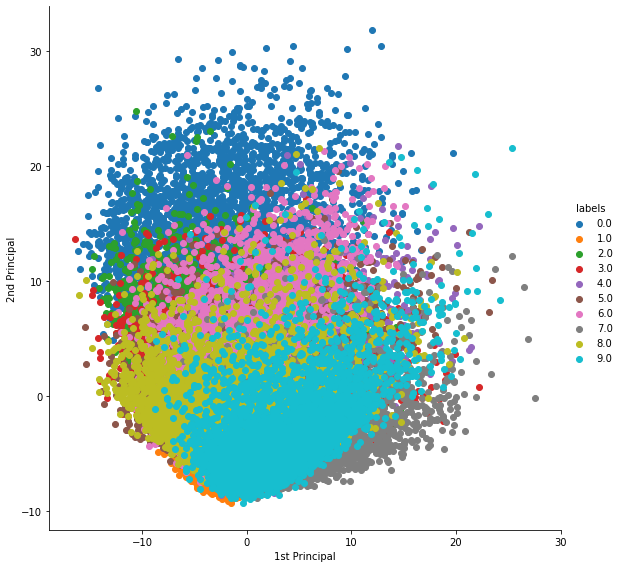

In [24]:
#Plotting the 2D data points with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(dataframe,hue="labels",size=8).map(plt.scatter,"1st Principal","2nd Principal" ).add_legend()
    
plt.show()

## PCA using Scikit learn


In [39]:
#Initialize the PCA
from sklearn import decomposition
pca=decomposition.PCA()
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [40]:
#Configuring the Parameter the number of components=2
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
pca_data

array([[-5.14054487, -5.227194  ],
       [19.29230113,  6.03257253],
       [-7.64448752, -1.70582686],
       ...,
       [ 0.49534681,  7.07570206],
       [ 2.30732233, -4.3433314 ],
       [-4.80764603,  1.56014492]])

In [41]:
#PCA reduced will contain the 2D projects of sample data
print("Shape of reduced PCA.shape=",pca_data.shape)

Shape of reduced PCA.shape= (42000, 2)


In [42]:
#plot:
#Appendind label to the 2D projected data
pca_data=np.vstack((pca_data.T,labels)).T
pca_data.shape


(42000, 3)

In [44]:
#Creating a new data frame for plotting the labelled points
pca_df=pd.DataFrame(data=pca_data,columns=("1st Principal","2nd Principal","labels"))


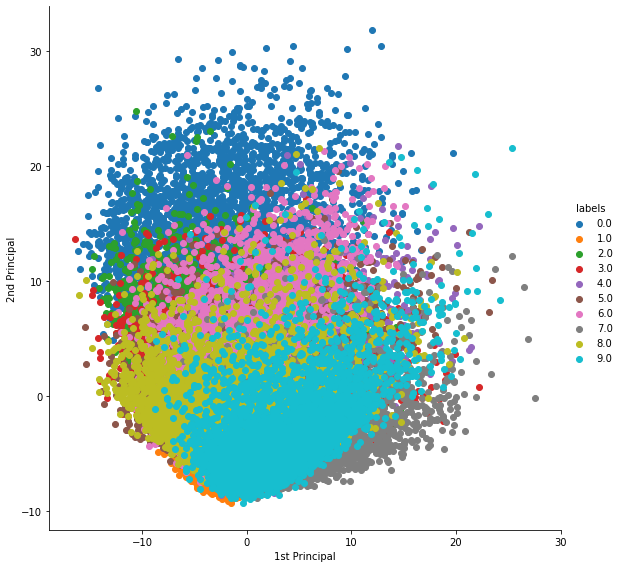

In [46]:
#Plotting the 2D data points with seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(dataframe,hue="labels",size=8).map(plt.scatter,"1st Principal","2nd Principal" ).add_legend()
    
plt.show()